<a href="https://colab.research.google.com/github/dschloe/kdx_competition/blob/master/final_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 전처리

In [15]:
%config InlineBackend.figure_format = 'retina'
!sudo apt-get -qq -y install fonts-nanum

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144611 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

In [2]:
for font in fm.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)

NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf


In [3]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumGothic') 
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 
mpl.font_manager._rebuild()
fm._rebuild()

Text(0.3, 0.3, '한글')

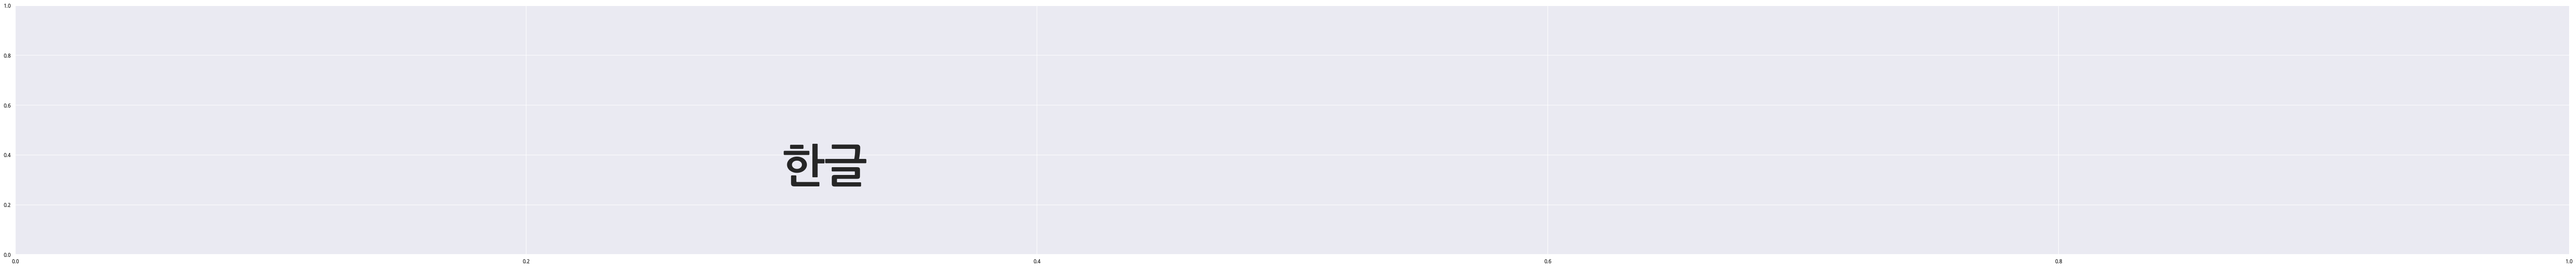

In [42]:
font = {'family' : 'NanumGothic',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.text(0.3, 0.3, '한글', size=100)

In [5]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# import join used to join ROOT path and MY_GOOGLE_DRIVE_PATH
from os.path import join  

# path to your project on Google Drive
MY_GOOGLE_DRIVE_PATH = 'My Drive/Colab Notebooks/competition/data'

PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
print(PROJECT_PATH)

/content/drive/My Drive/Colab Notebooks/competition/data


In [7]:
%cd "{PROJECT_PATH}"

/content/drive/My Drive/Colab Notebooks/competition/data


In [8]:
%ls

Samsungcard.csv  Samsungcard.xlsx


## Chapter 1. 데이터셋 소개

In [9]:
import pandas as pd

Samsungcard = pd.read_csv('Samsungcard.csv', encoding="EUC-KR")
Samsungcard.head()

,소비일자,소비업종,성별,연령대,소비건수
0,20190101,가전/가구,남성,20대,5529
1,20190101,가전/가구,남성,30대,17536
2,20190101,가전/가구,남성,40대,22838
3,20190101,가전/가구,남성,50대,15801
4,20190101,가전/가구,남성,60대,6772


In [10]:
Samsungcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76580 entries, 0 to 76579
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   소비일자    76580 non-null  int64 
 1   소비업종    76580 non-null  object
 2   성별      76580 non-null  object
 3   연령대     76580 non-null  object
 4   소비건수    76580 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.9+ MB


In [11]:
data = Samsungcard.copy()
data['소비일자'] = pd.to_datetime(data['소비일자'], format = "%Y%m%d")
data.head()

round(data.pivot_table(index = "성별", aggfunc=['sum', 'mean']), 1)

,sum,mean
,소비건수,소비건수
성별,,
남성,6096607056,159221.9
여성,4997931104,130528.4


In [12]:
round(data.pivot_table(index = "연령대", aggfunc=['sum', 'mean']), 1)

,sum,mean
,소비건수,소비건수
연령대,,
20대,1390018481,90756.0
30대,2792196071,182305.8
40대,3406545883,222417.5
50대,2404057919,156963.8
60대,1101719806,71932.6


In [13]:
round(data.pivot_table(index = ["성별", "연령대"], aggfunc=['sum', 'mean']), 1)

sum      mean
              소비건수      소비건수
성별 연령대                      
남성 20대   695344441   90799.7
   30대  1600630328  209014.1
   40대  1922281076  251016.1
   50대  1281358199  167322.8
   60대   596993012   77956.8
여성 20대   694674040   90712.2
   30대  1191565743  155597.5
   40대  1484264807  193818.9
   50대  1122699720  146604.8
   60대   504726794   65908.4

## Chapter 2. 데이터 시각화


### (1) 업종별 막대 그래프

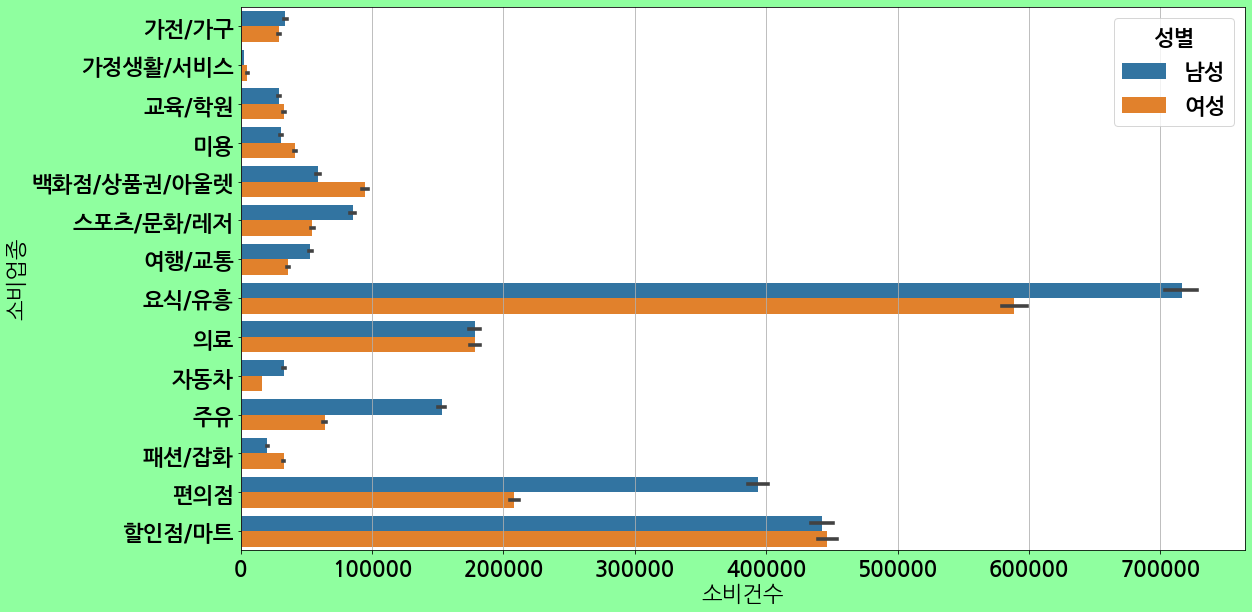

In [14]:
fig = plt.figure(figsize=(18, 10))
fig.patch.set_facecolor('xkcd:mint green')
sns.barplot(x="소비건수", y="소비업종", hue= "성별", data=Samsungcard)

['요식/유흥', '할인점/마트', '편의점', '의료', '주유', '백화점/상품권/아울렛', '스포츠/문화/레저']
['가전/가구', '가정생활/서비스', '교육/학원', '미용', '여행/교통', '자동차', '패션/잡화']


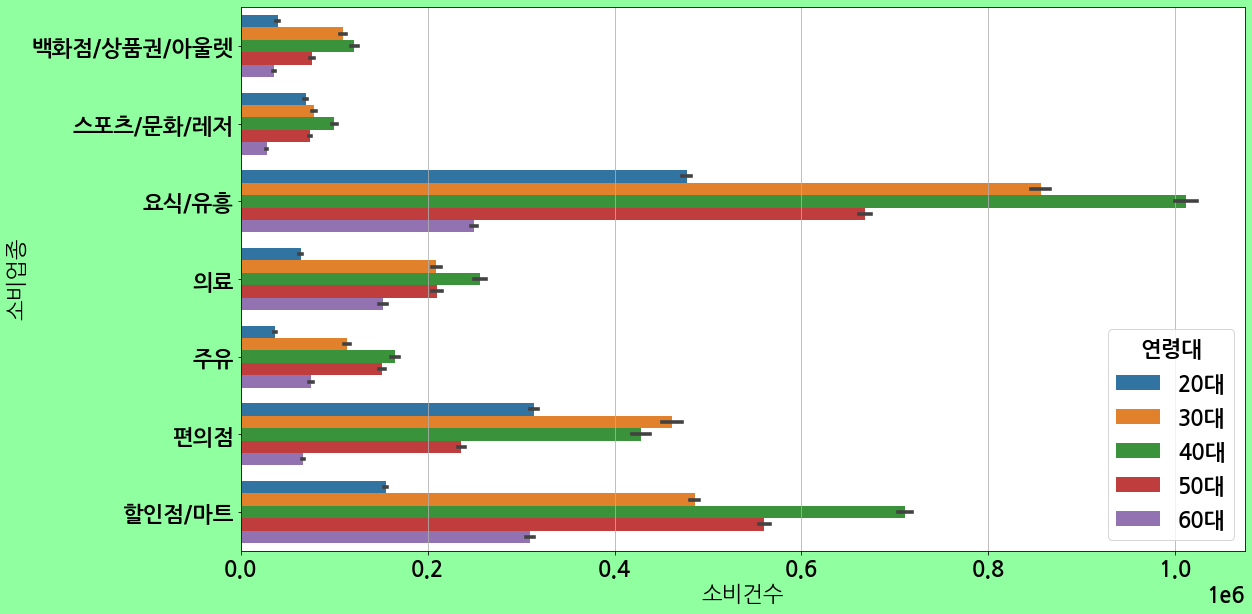

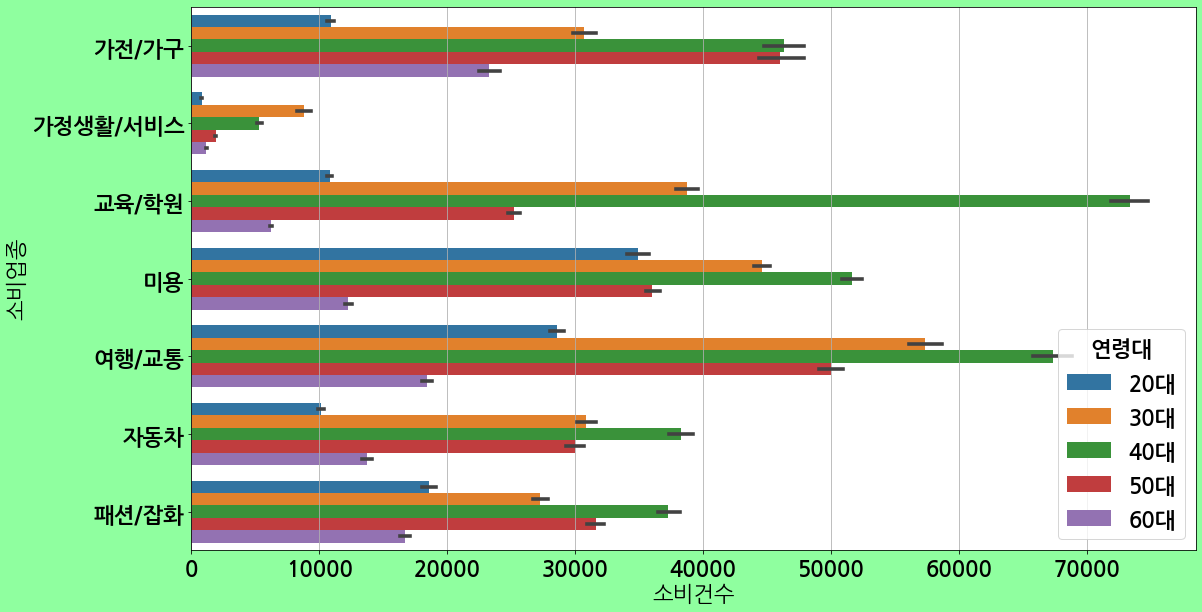

In [15]:
top_cat_list = ["요식/유흥", "할인점/마트", "편의점", "의료", "주유", "백화점/상품권/아울렛", "스포츠/문화/레저"]
bottom_cat_list = ["가전/가구", "가정생활/서비스", "교육/학원", "미용", "여행/교통", "자동차", "패션/잡화"]
total_list = [top_cat_list, bottom_cat_list]

for idx in range(0,2):
  print(total_list[idx])
  temp = Samsungcard.loc[Samsungcard['소비업종'].isin(total_list[idx])]
  fig = plt.figure(figsize=(18, 10))
  fig.patch.set_facecolor('xkcd:mint green')
  sns.barplot(x="소비건수", y="소비업종", hue= "연령대", data=temp)

### (2) 업종별 월별 그래프
- 월별로 시각화를 진행하였다.

In [16]:
Samsungcard['date'] = Samsungcard['소비일자'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [17]:
Samsungcard['month_year'] = pd.to_datetime(Samsungcard['date']).dt.to_period('M')

# Delete 소비일자 및 date
new_df = Samsungcard.copy()

new_df.drop(['소비일자', 'date'], axis='columns', inplace=True)
new_df.head()

,소비업종,성별,연령대,소비건수,month_year
0,가전/가구,남성,20대,5529,2019-01
1,가전/가구,남성,30대,17536,2019-01
2,가전/가구,남성,40대,22838,2019-01
3,가전/가구,남성,50대,15801,2019-01
4,가전/가구,남성,60대,6772,2019-01


In [18]:
new_df.groupby(['month_year', '소비업종'], as_index=False).mean().round(1)

,month_year,소비업종,소비건수
0,2019-01,가전/가구,29160.9
1,2019-01,가정생활/서비스,3935.6
2,2019-01,교육/학원,33435.9
3,2019-01,미용,35881.9
4,2019-01,백화점/상품권/아울렛,74153.8
...,...,...,...
247,2020-06,자동차,25367.8
248,2020-06,주유,99725.1
249,2020-06,패션/잡화,27503.3
250,2020-06,편의점,326480.2


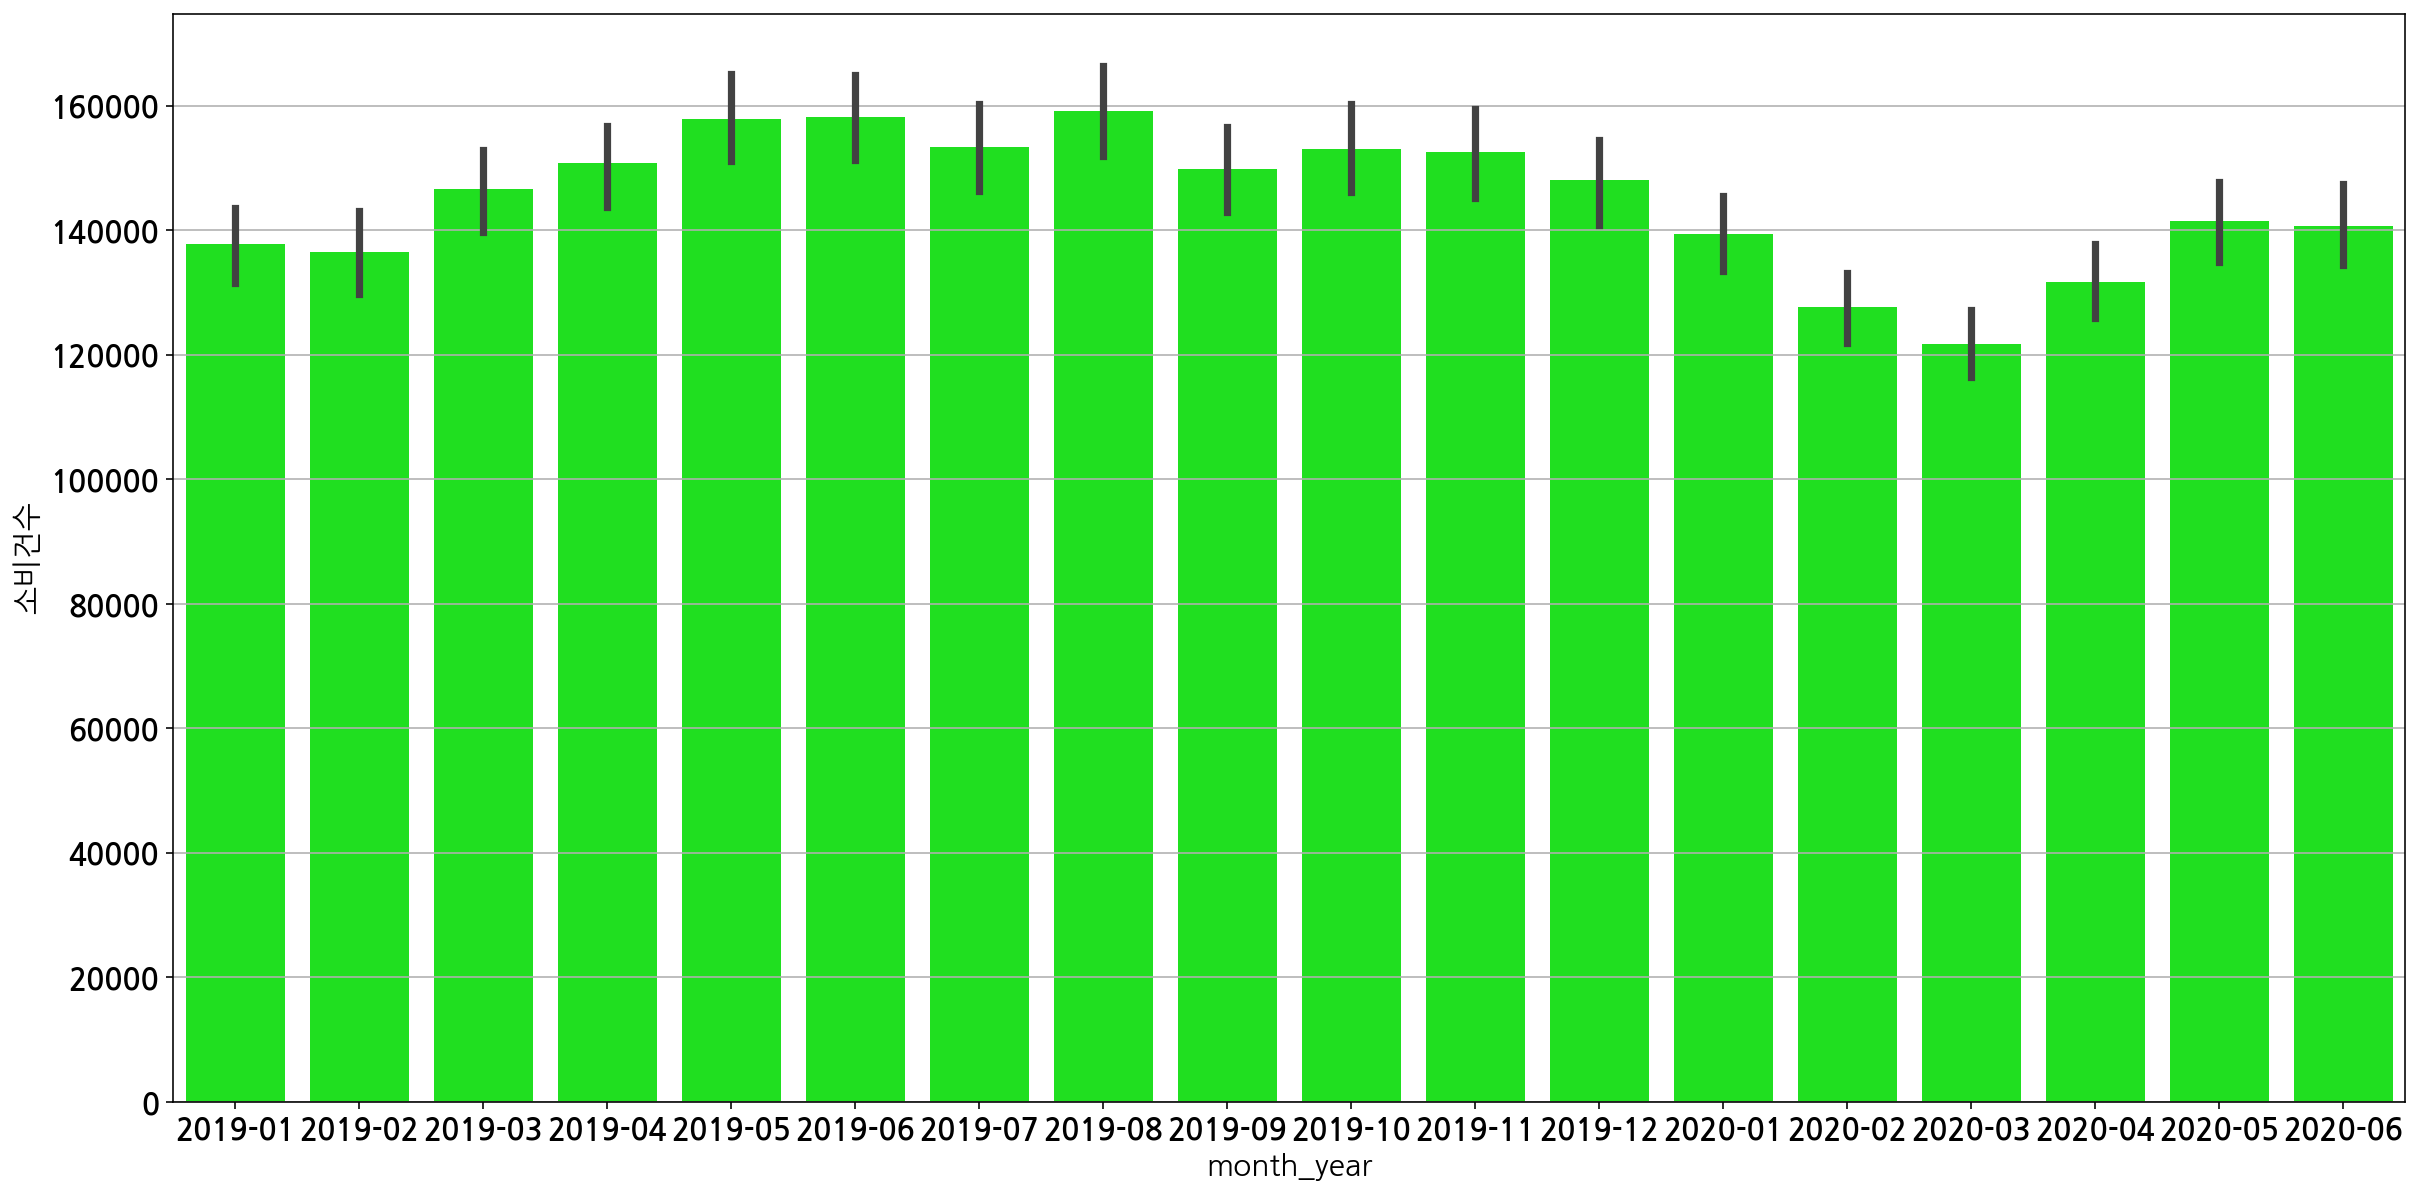

In [28]:
sns.barplot(x = "month_year", y = "소비건수", data = new_df, color = "#00FF00")

- 이제 업종별 그래프를 작성해본다. 

0 가전/가구
1 가정생활/서비스
2 교육/학원
3 미용
4 백화점/상품권/아울렛
5 스포츠/문화/레저
6 여행/교통
7 요식/유흥
8 의료
9 자동차
10 주유
11 패션/잡화
12 편의점
13 할인점/마트


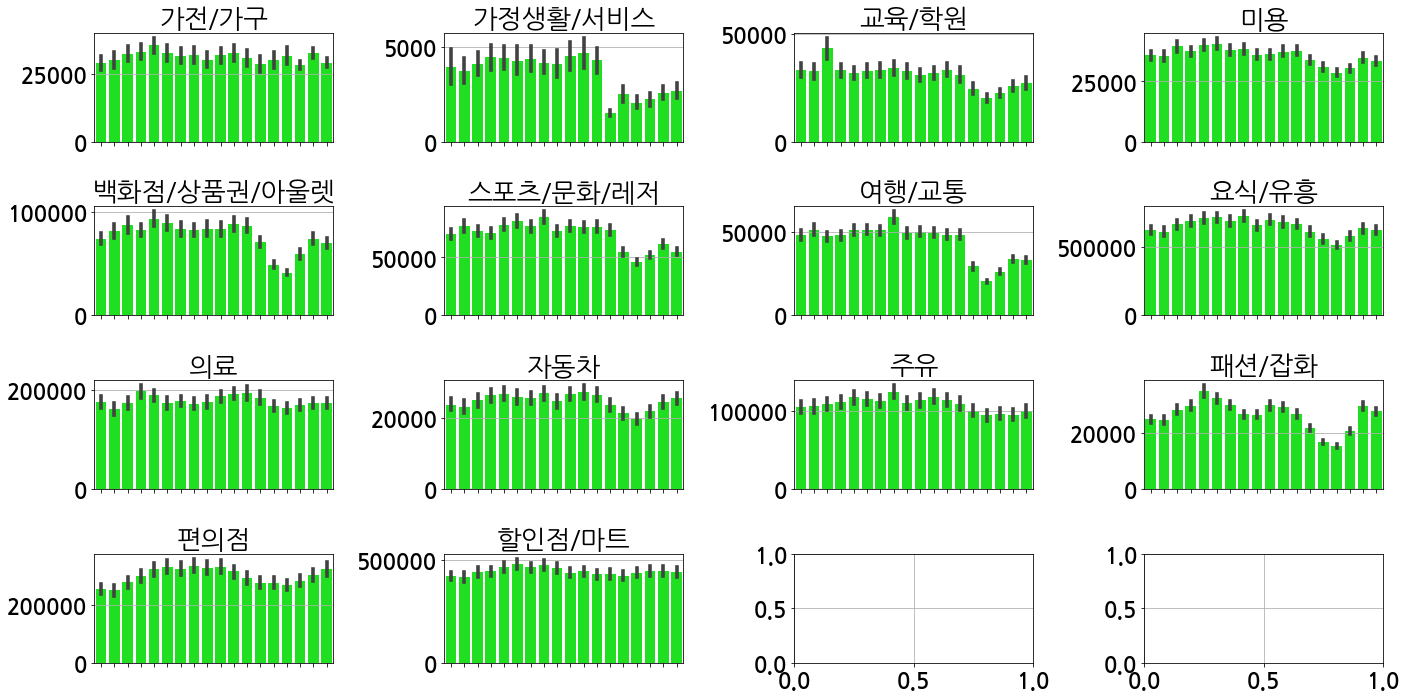

In [19]:
cat_list = new_df['소비업종'].unique().tolist()
fig, ax = plt.subplots(4, 4, figsize=(20, 10))

for i, col in enumerate(cat_list): # 좌표 평면 지정
     print(i, col)
     if i <= 3:
        temp = new_df.loc[new_df['소비업종'] == cat_list[i]]
        g1 = sns.barplot(x = "month_year", y = "소비건수", data = temp, color = "#00FF00", ax=ax[0,i])
        g1.set(xticklabels=[])  
        g1.set(title=cat_list[i])  
        g1.set(xlabel=None)
        g1.set(ylabel=None)
     elif i <= 7:
        temp = new_df.loc[new_df['소비업종'] == cat_list[i]]
        g1 = sns.barplot(x = "month_year", y = "소비건수", data = temp, color = "#00FF00", ax=ax[1, i-4])
        g1.set(xticklabels=[])  
        g1.set(title=cat_list[i])  
        g1.set(xlabel=None)
        g1.set(ylabel=None)
     elif i <= 11:
        temp = new_df.loc[new_df['소비업종'] == cat_list[i]]
        g1 = sns.barplot(x = "month_year", y = "소비건수", data = temp, color = "#00FF00", ax=ax[2, i-8])
        g1.set(xticklabels=[])
        g1.set(title=cat_list[i])  
        g1.set(xlabel=None)
        g1.set(ylabel=None)  
     else:
        temp = new_df.loc[new_df['소비업종'] == cat_list[i]]
        g1 = sns.barplot(x = "month_year", y = "소비건수", data = temp, color = "#00FF00", ax=ax[3, i-12])
        g1.set(xticklabels=[])  
        g1.set(title=cat_list[i])  
        g1.set(xlabel=None) 
        g1.set(ylabel=None)

fig.tight_layout()
fig.subplots_adjust(top=0.95)

### (3) 업종별 시계열 그래프
- 여기에서 여행/교통, 백화점/상품권/아울렛, 스포츠/문화/레저 업종별로, 시계열 그래프를 그려보도록 한다. 
  + 이 때, 주 소비층인 30대-50대로 연령대를 추출한다. 

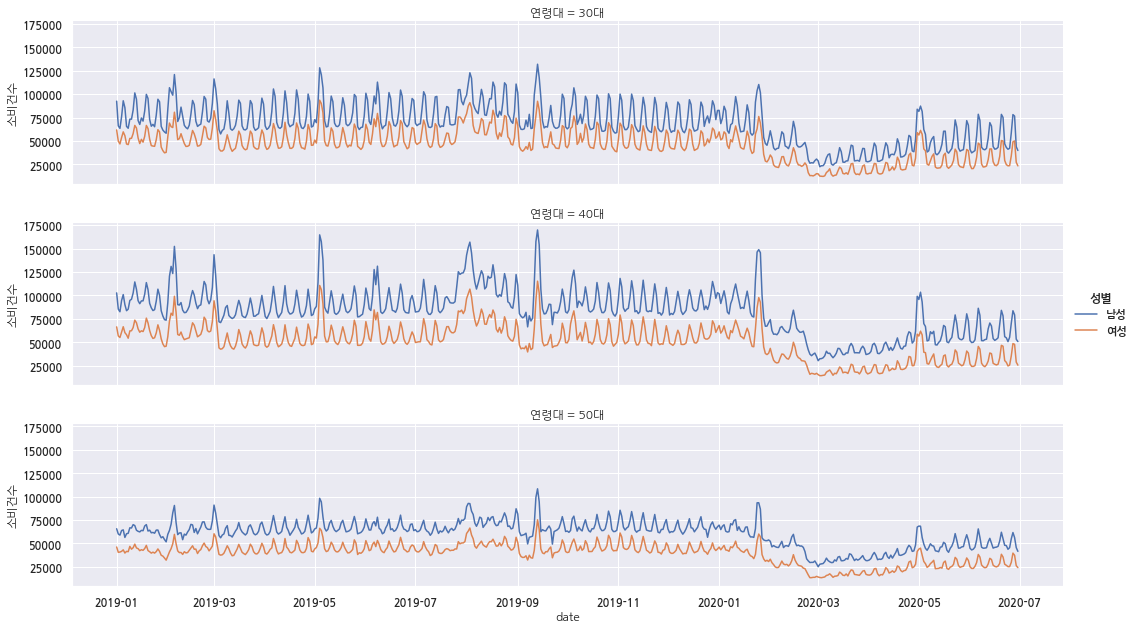

In [56]:
new_df = Samsungcard.copy()
new_df.drop(['month_year', '소비일자'], axis='columns', inplace=True)
travel_df = new_df.loc[new_df['소비업종']=="여행/교통", ].reset_index(drop=True)
travel_df = travel_df.loc[new_df['연령대'].isin(["30대", "40대", "50대"])].reset_index(drop=True)

sns.relplot(data=travel_df, 
            x="date", 
            y="소비건수", 
            hue="성별", 
            markers=True, 
            dashes=False, 
            row="연령대", 
            kind="line", height=3, aspect=5.0)

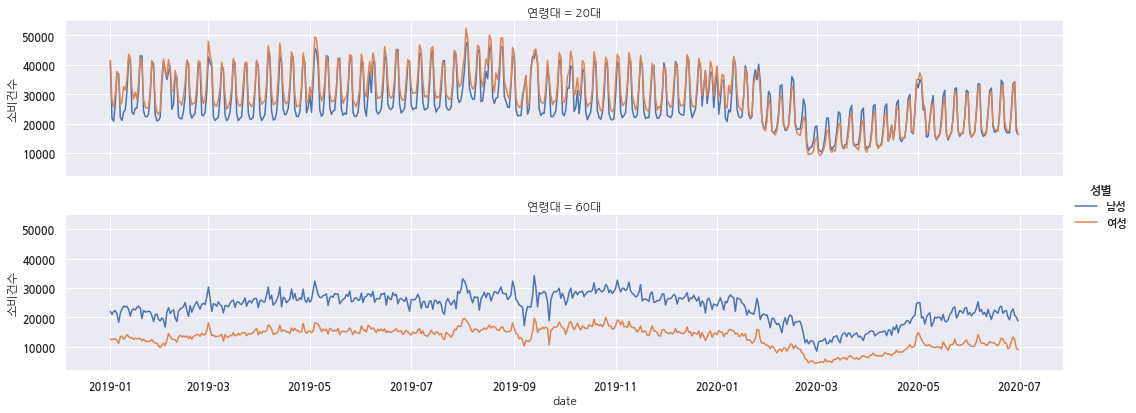

In [57]:
new_df = Samsungcard.copy()
new_df.drop(['month_year', '소비일자'], axis='columns', inplace=True)
travel_df = new_df.loc[new_df['소비업종']=="여행/교통", ].reset_index(drop=True)
travel_df = travel_df.loc[new_df['연령대'].isin(["20대", "60대"])].reset_index(drop=True)

sns.relplot(data=travel_df, 
            x="date", 
            y="소비건수", 
            hue="성별", 
            markers=True, 
            dashes=False, 
            row="연령대", 
            kind="line", height=3, aspect=5.0)

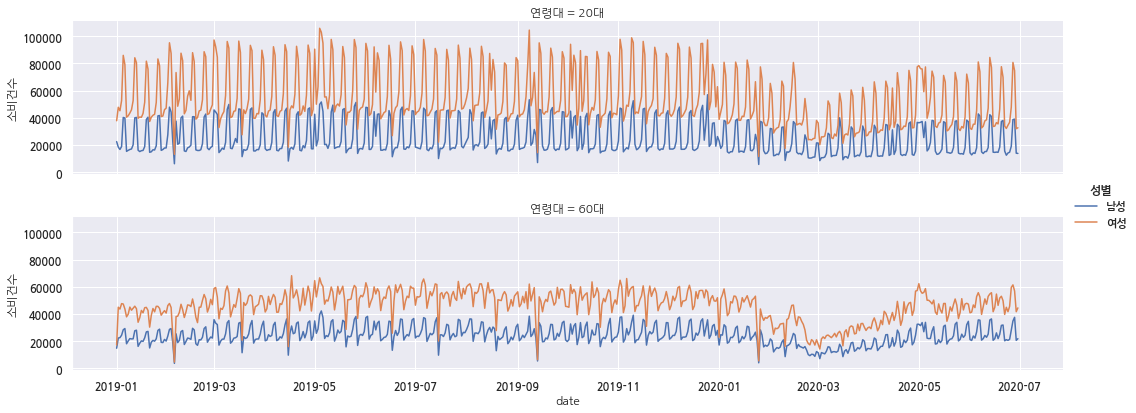

In [62]:
def time_series_plot(data, cat_col_val, age_val):
    new_df = data.copy()
    new_df.drop(['month_year', '소비일자'], axis='columns', inplace=True)
    travel_df = new_df.loc[new_df['소비업종']==cat_col_val, ].reset_index(drop=True)
    travel_df = travel_df.loc[new_df['연령대'].isin(age_val)].reset_index(drop=True)
    sns.relplot(data=travel_df, 
                x="date", 
                y="소비건수", 
                hue="성별", 
                markers=True, 
                dashes=False, 
                row="연령대", 
                kind="line", height=3, aspect=5.0)

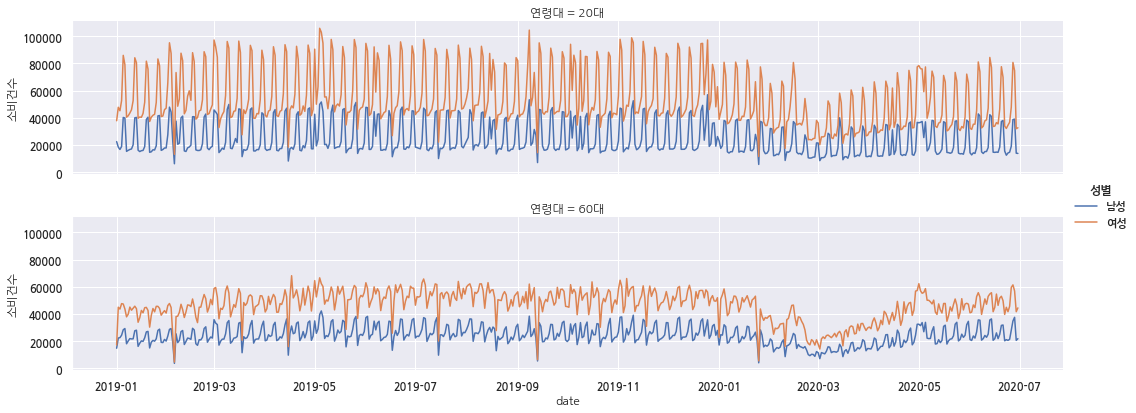

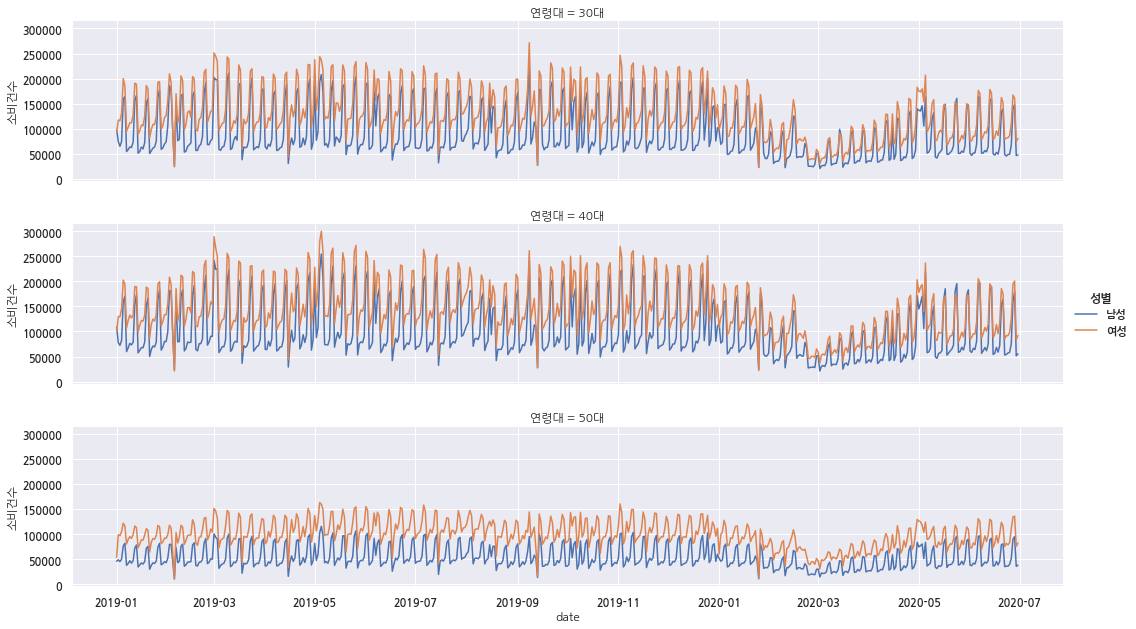

In [63]:
time_series_plot(Samsungcard, "백화점/상품권/아울렛", ["20대", "60대"])
time_series_plot(Samsungcard, "백화점/상품권/아울렛", ["30대", "40대", "50대"])

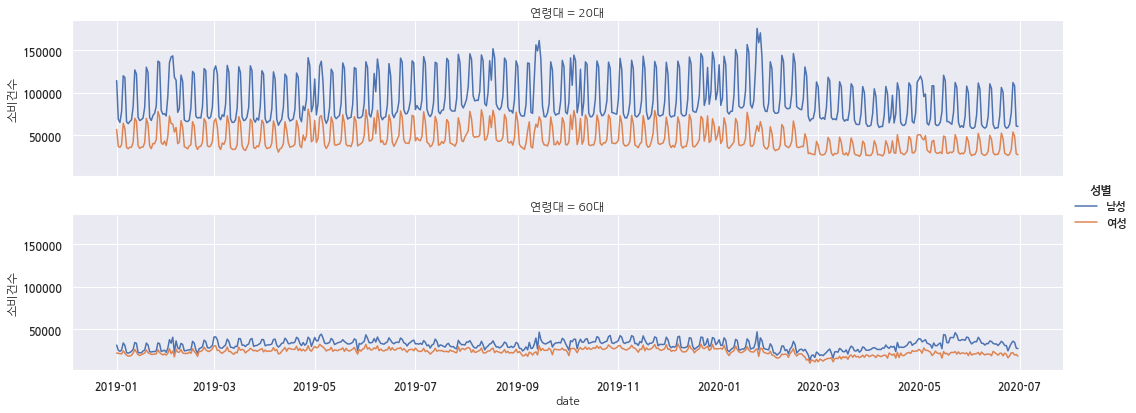

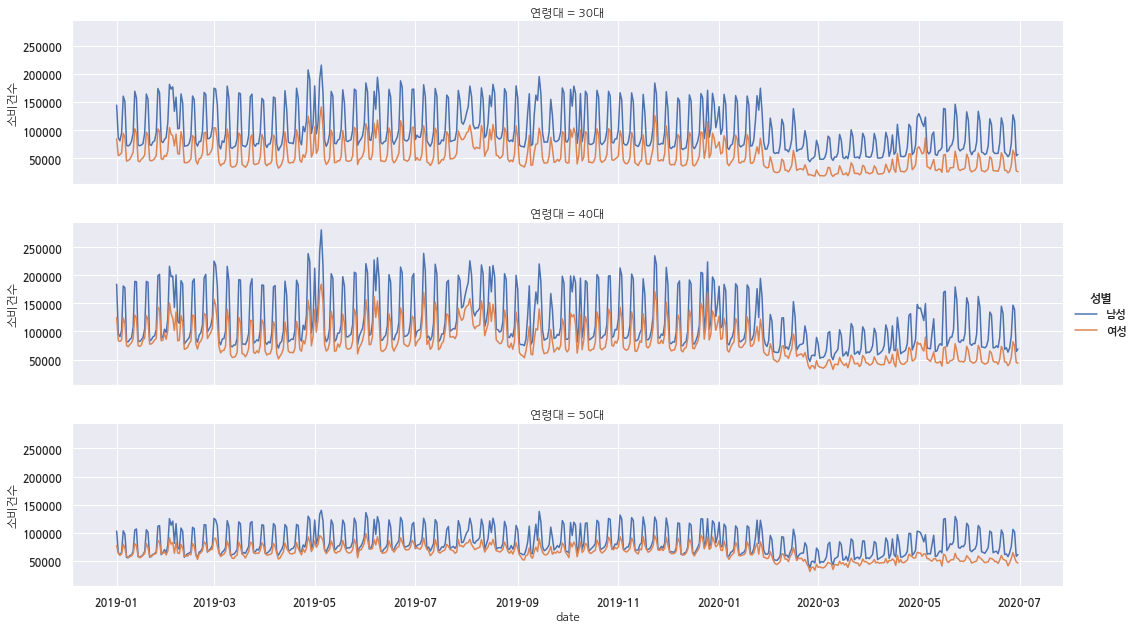

In [64]:
time_series_plot(Samsungcard, "스포츠/문화/레저", ["20대", "60대"])
time_series_plot(Samsungcard, "스포츠/문화/레저", ["30대", "40대", "50대"])

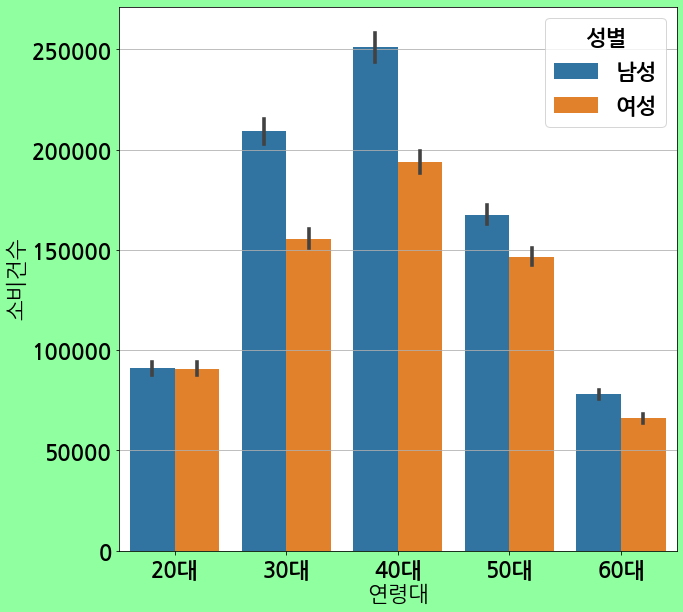

In [ ]:
"fig = plt.figure(figsize=(10, 10))
fig.patch.set_facecolor('xkcd:mint green')
sns.barplot(x="연령대", y="소비건수", hue= "성별", data=Samsungcard)

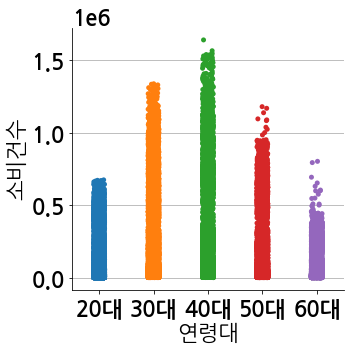

In [ ]:
sns.catplot(x="연령대", y="소비건수", data=Samsungcard)

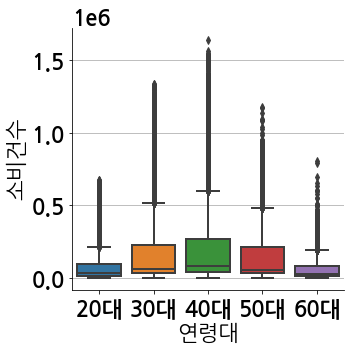

In [ ]:
sns.catplot(x="연령대", y="소비건수", kind="box", data=Samsungcard)

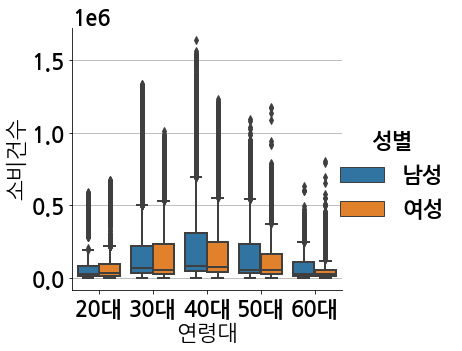

In [ ]:
sns.catplot(x="연령대", y="소비건수", hue="성별", kind="box", data=Samsungcard)

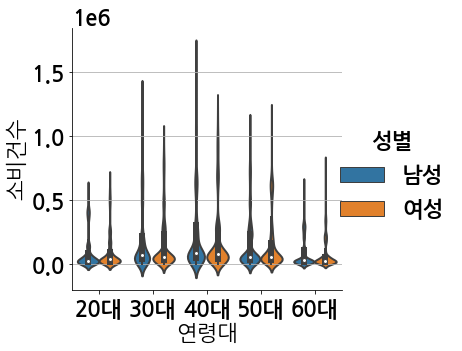

In [ ]:
sns.catplot(x="연령대", y="소비건수", hue="성별",
            kind="violin", data=Samsungcard)

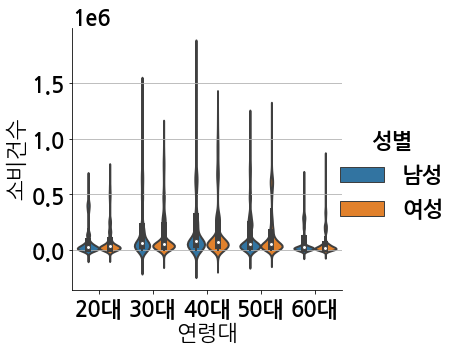

In [ ]:
sns.catplot(x="연령대", y="소비건수", hue="성별",
            kind="violin", bw=.15, cut=5,
            data=Samsungcard)

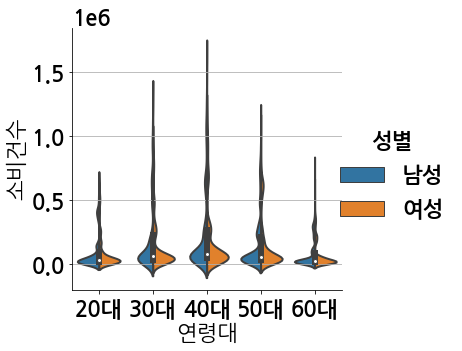

In [ ]:
sns.catplot(x="연령대", y="소비건수", hue="성별",
            kind="violin", split=True, data=Samsungcard)

<Figure size 720x720 with 0 Axes>

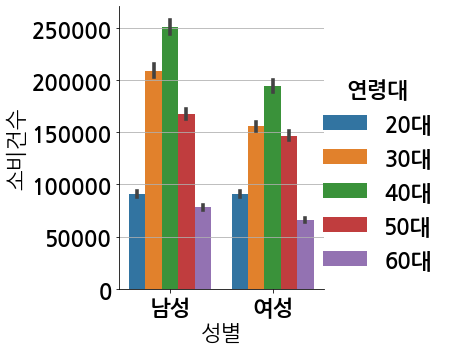

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.catplot(x="성별", y="소비건수", hue="연령대", kind="bar", data=Samsungcard)

<Figure size 1440x1440 with 0 Axes>

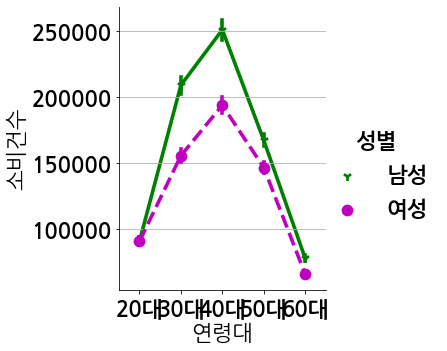

In [ ]:
fig = plt.figure(figsize=(20, 20))
sns.catplot(x="연령대", y="소비건수", hue="성별",
            palette={"남성": "g", "여성": "m"},
            markers=["1", "o"], linestyles=["-", "--"],
            kind="point", data=Samsungcard)

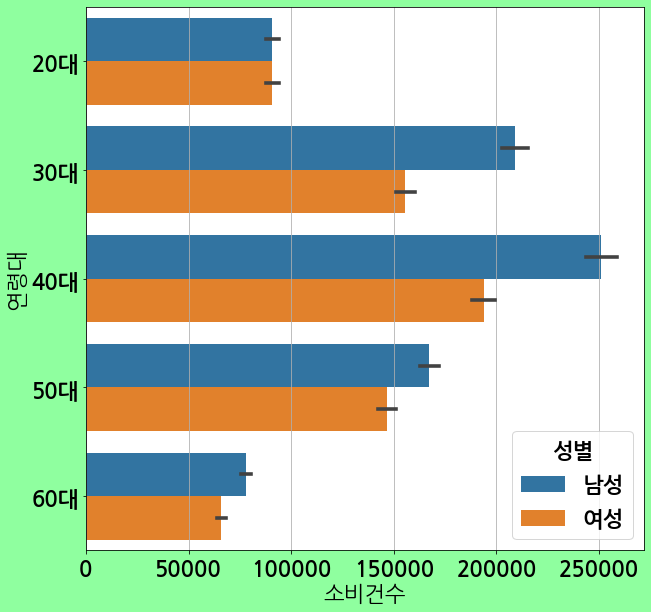

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.patch.set_facecolor('xkcd:mint green')
sns.barplot(x="소비건수", y="연령대", hue= "성별", data=Samsungcard)

<Figure size 720x720 with 0 Axes>

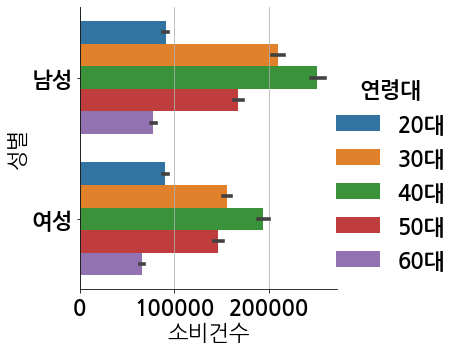

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.catplot(x="소비건수", y="성별", hue="연령대", kind="bar", data=Samsungcard)

<Figure size 720x720 with 0 Axes>

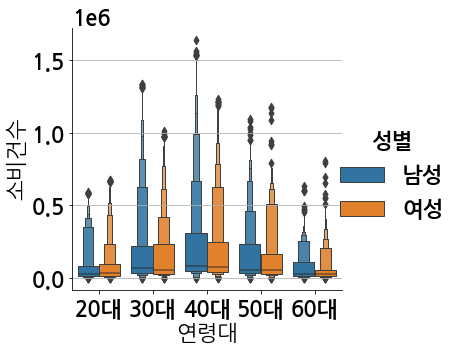

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.catplot(x="연령대", y="소비건수", hue="성별", kind="boxen", data=Samsungcard)

<Figure size 720x720 with 0 Axes>

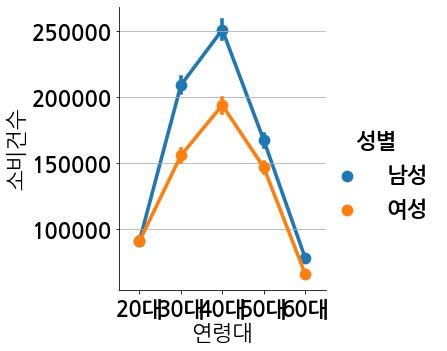

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.catplot(x="연령대", y="소비건수", hue="성별", kind="point", data=Samsungcard)

<Figure size 720x720 with 0 Axes>

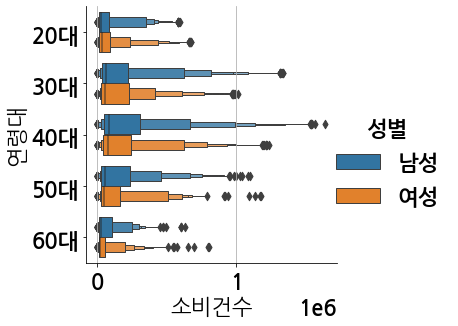

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.catplot(x="소비건수", y="연령대", hue="성별", kind="boxen", data=Samsungcard)

<Figure size 720x720 with 0 Axes>

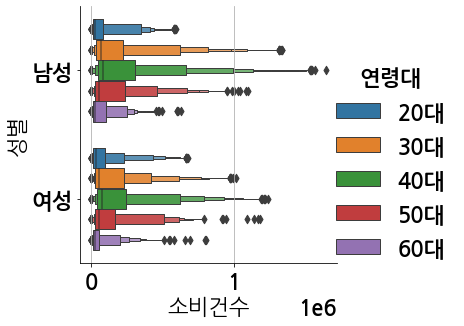

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.catplot(x="소비건수", y="성별", hue="연령대", kind="boxen", data=Samsungcard)

<Figure size 720x720 with 0 Axes>

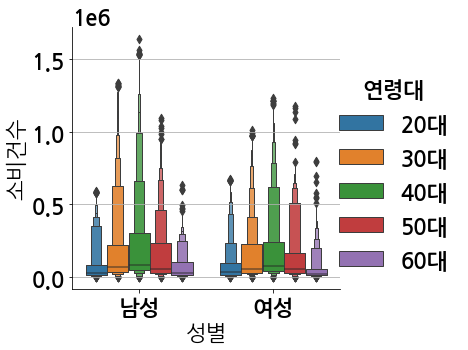

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.catplot(x="성별", y="소비건수", hue="연령대", kind="boxen", data=Samsungcard)

<Figure size 720x720 with 0 Axes>

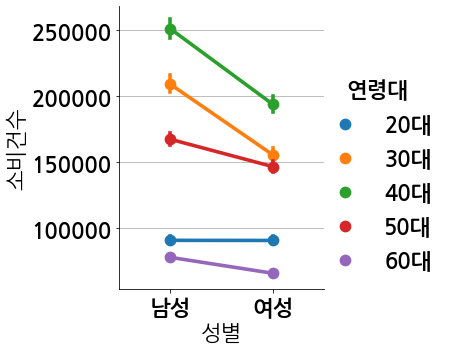

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.catplot(x="성별", y="소비건수", hue="연령대", kind="point", data=Samsungcard)

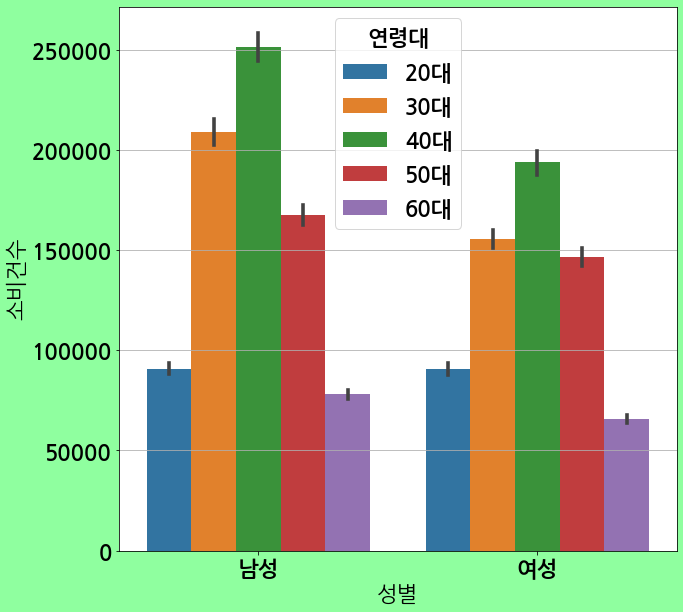

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.patch.set_facecolor('xkcd:mint green')
sns.barplot(x="성별", y="소비건수", hue= "연령대", data=Samsungcard)

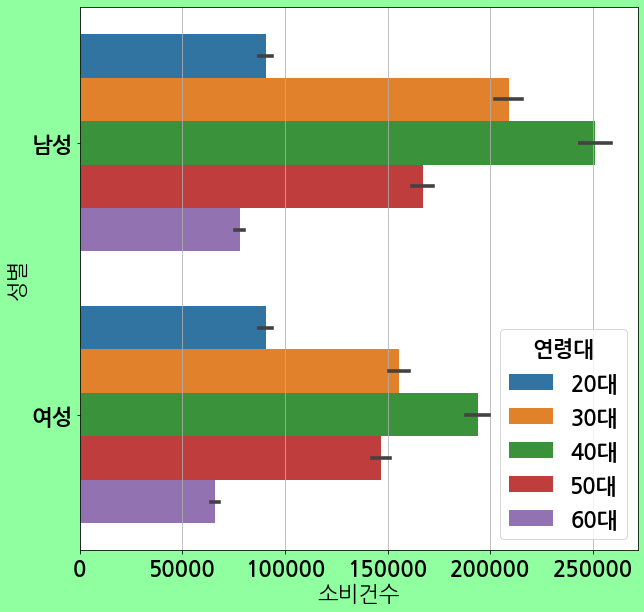

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.patch.set_facecolor('xkcd:mint green')
sns.barplot(x="소비건수", y="성별", hue= "연령대", data=Samsungcard)

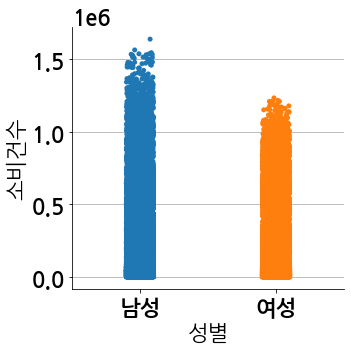

In [ ]:
sns.catplot(x="성별", y="소비건수", data=Samsungcard)

<Figure size 720x720 with 0 Axes>

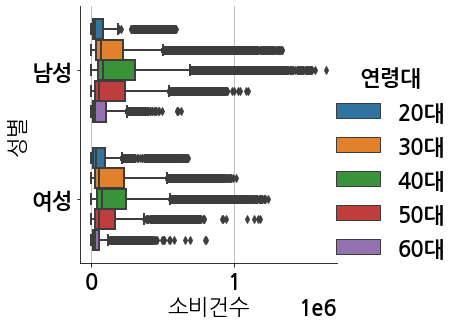

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.catplot(x="소비건수", y="성별", hue="연령대", kind="box", data=Samsungcard)

<Figure size 720x720 with 0 Axes>

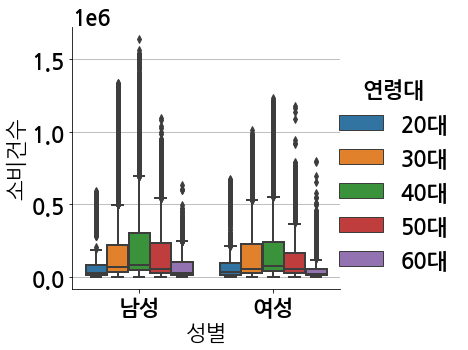

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.catplot(x="성별", y="소비건수", hue="연령대", kind="box", data=Samsungcard)

<Figure size 720x720 with 0 Axes>

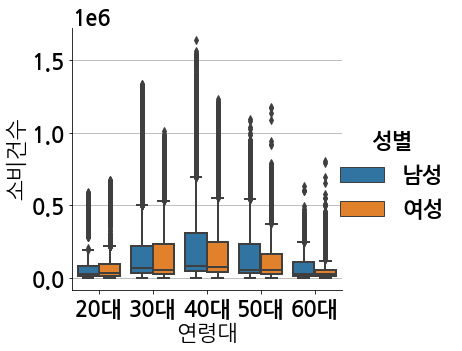

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.catplot(x="연령대", y="소비건수", hue="성별", kind="box", data=Samsungcard)

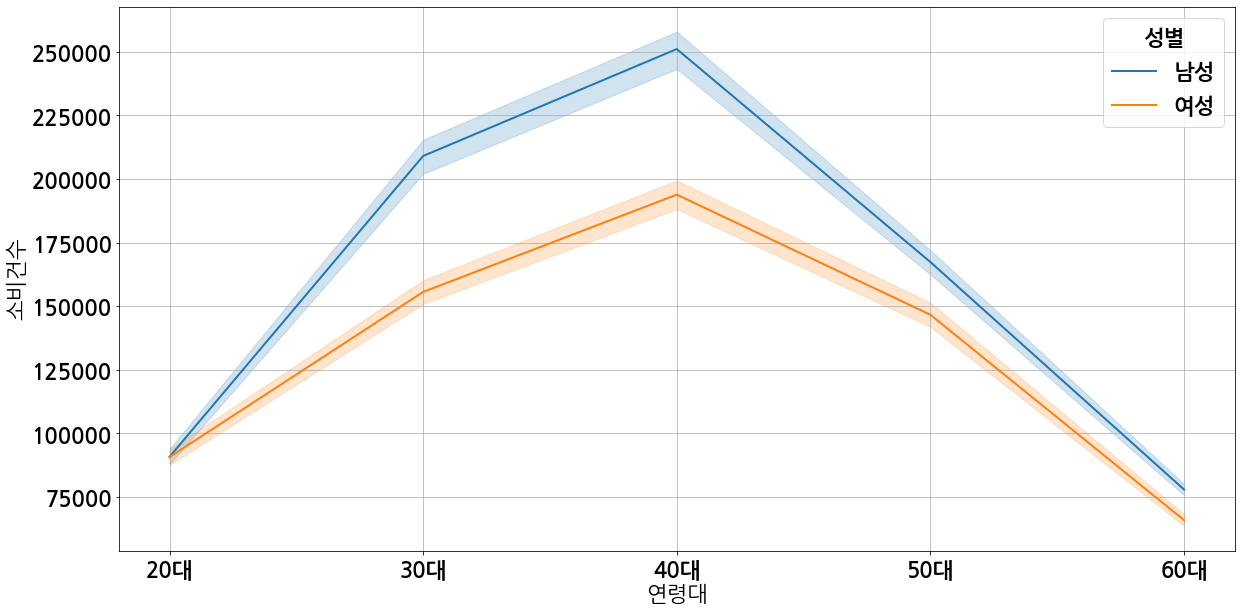

In [ ]:
sns.lineplot(x="연령대", y="소비건수", hue="성별", data=Samsungcard)

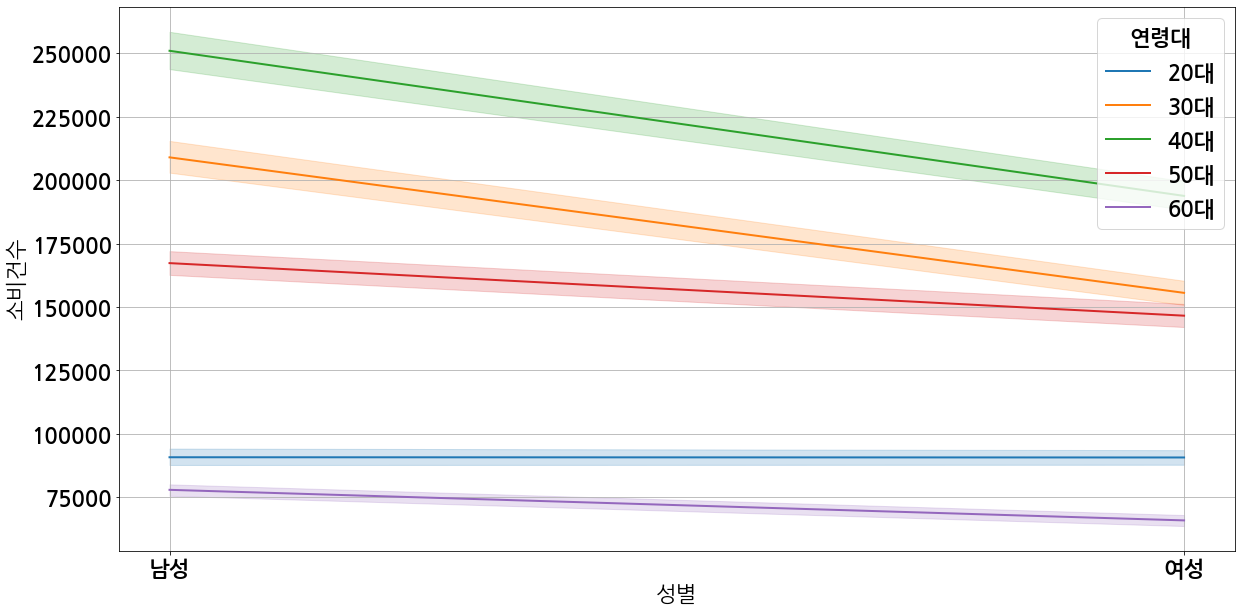

In [ ]:
sns.lineplot(x="성별", y="소비건수", hue="연령대", data=Samsungcard)

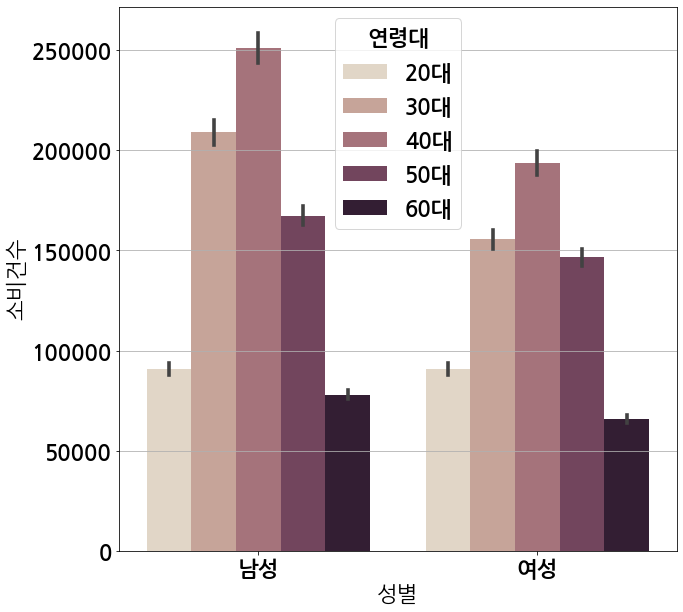

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.barplot(x="성별", y="소비건수", hue= "연령대", palette="ch:.25", data=Samsungcard)

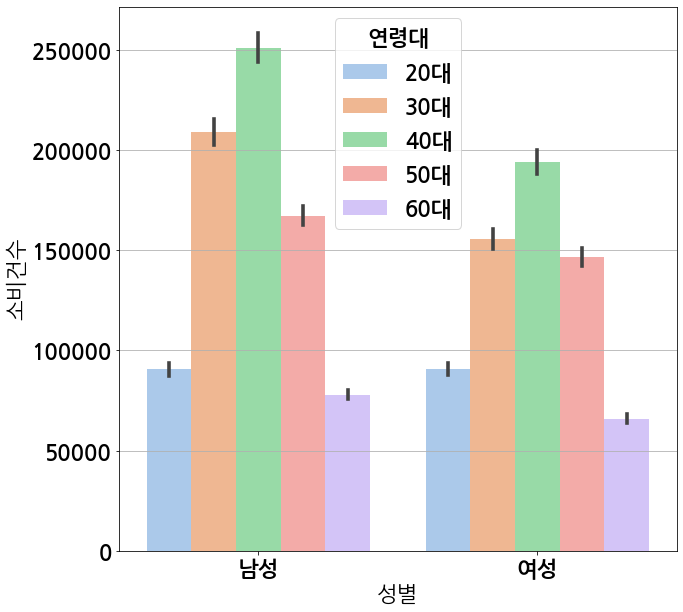

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.barplot(x="성별", y="소비건수", hue= "연령대", palette="pastel", data=Samsungcard)

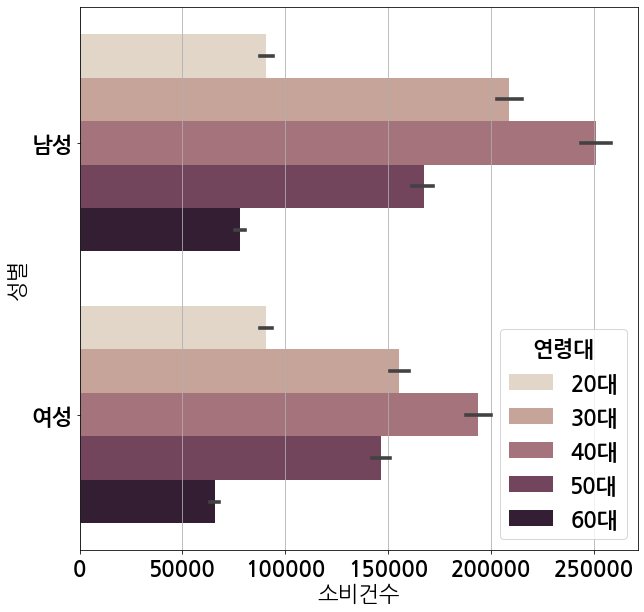

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.barplot(x="소비건수", y="성별", hue= "연령대", palette="ch:.25", data=Samsungcard)

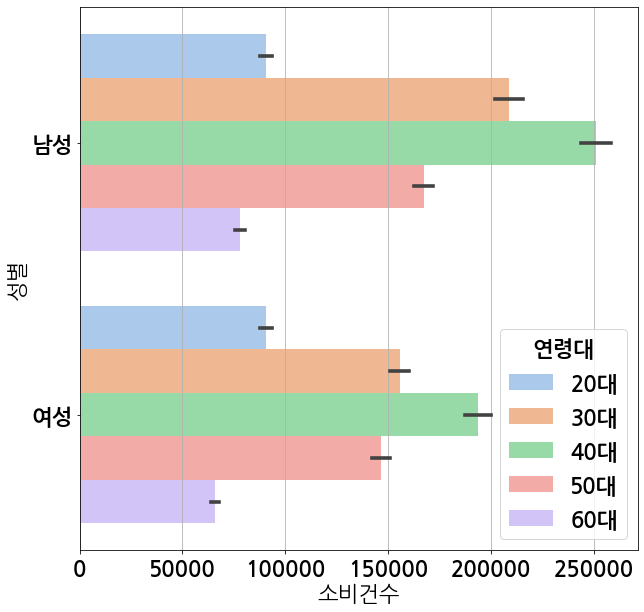

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.barplot(x="소비건수", y="성별", hue= "연령대", palette="pastel", data=Samsungcard)

<Figure size 720x720 with 0 Axes>

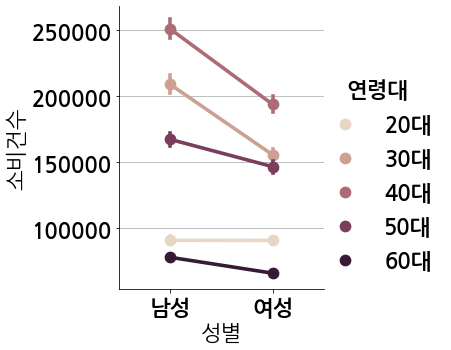

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.catplot(x="성별", y="소비건수", hue="연령대", kind="point", palette="ch:.25", data=Samsungcard)

<Figure size 720x720 with 0 Axes>

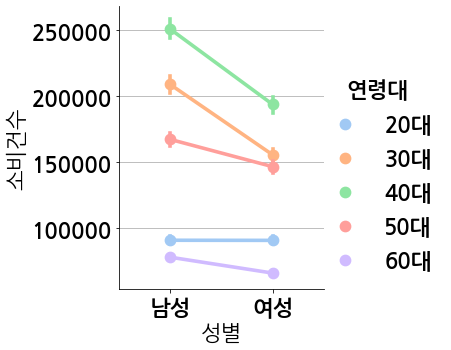

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.catplot(x="성별", y="소비건수", hue="연령대", kind="point", palette="pastel", data=Samsungcard)

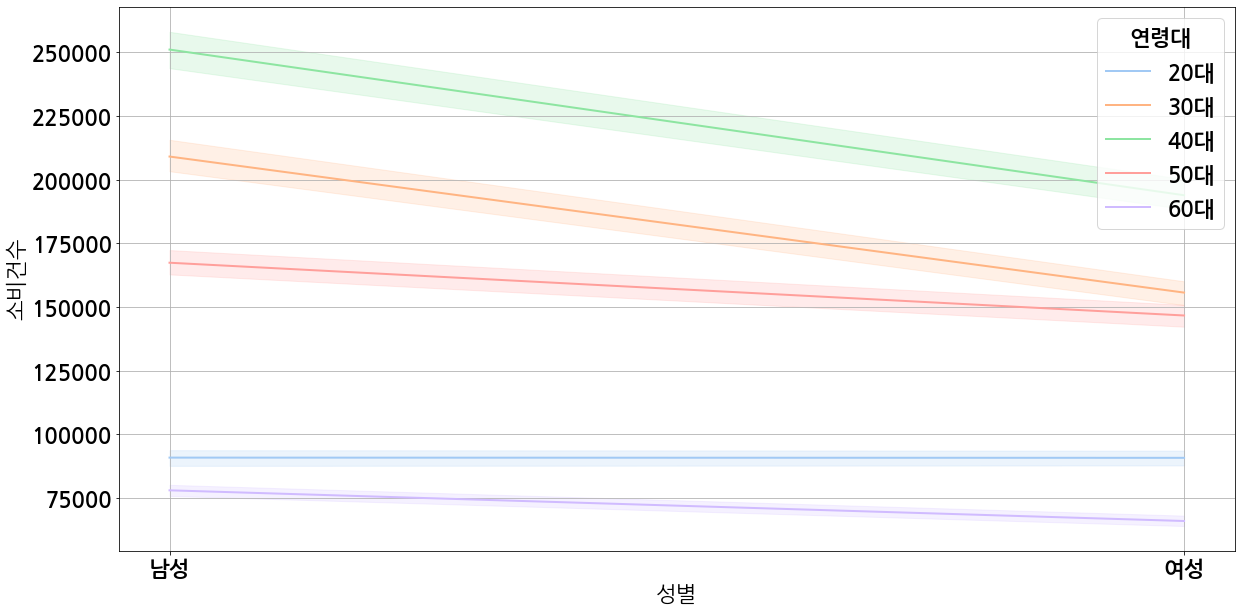

In [ ]:
sns.lineplot(x="성별", y="소비건수", hue="연령대", palette="pastel", data=Samsungcard)

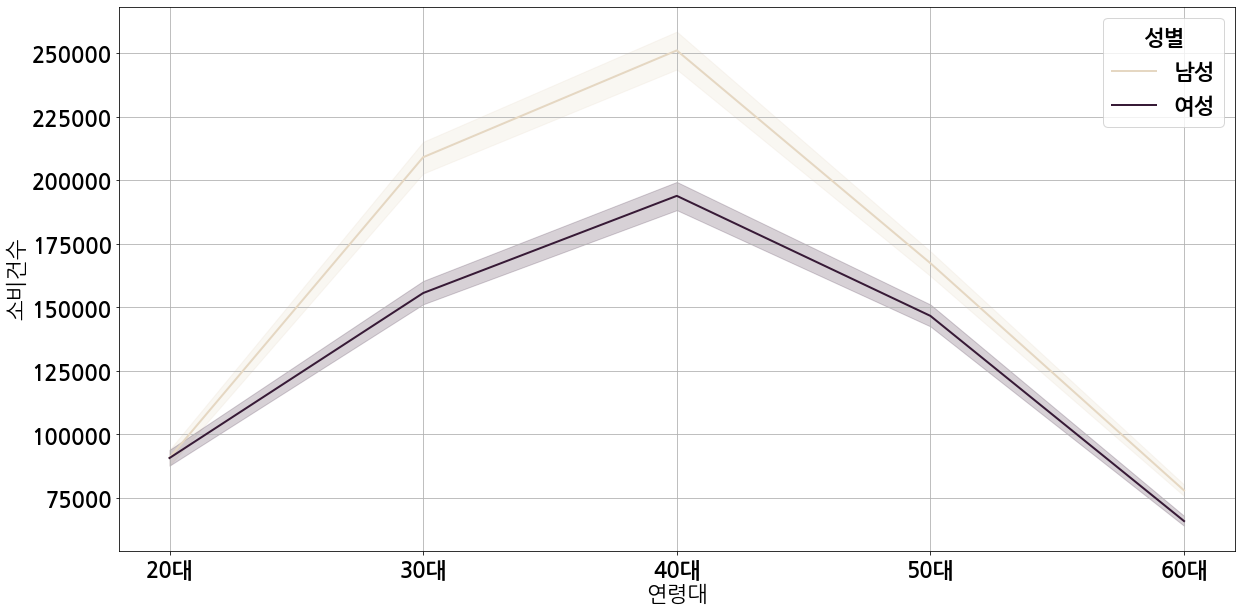

In [ ]:
sns.lineplot(x="연령대", y="소비건수", hue="성별", palette="ch:.25", data=Samsungcard)

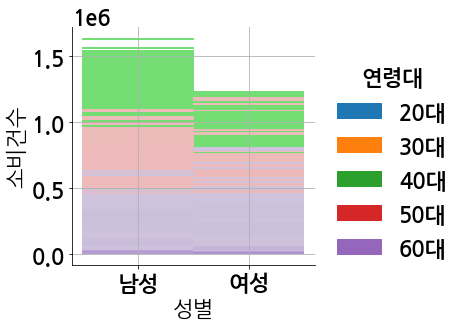

In [ ]:
sns.displot(x="성별", y="소비건수", hue="연령대", data=Samsungcard)

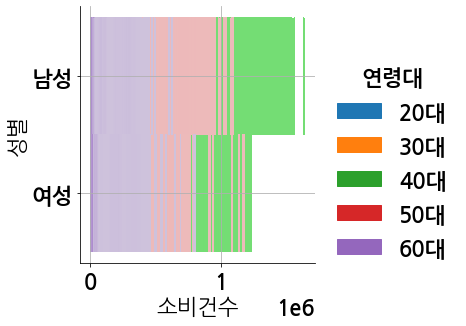

In [ ]:
sns.displot(x="소비건수", y="성별", hue="연령대", data=Samsungcard)

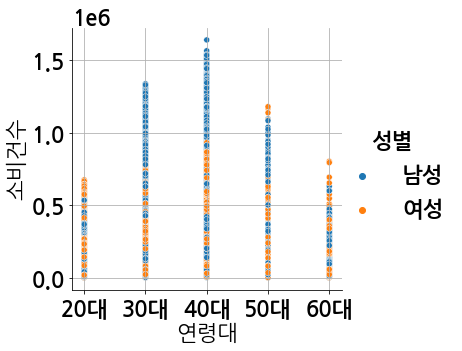

In [ ]:
sns.relplot(x="연령대", y="소비건수", hue="성별", data=Samsungcard)

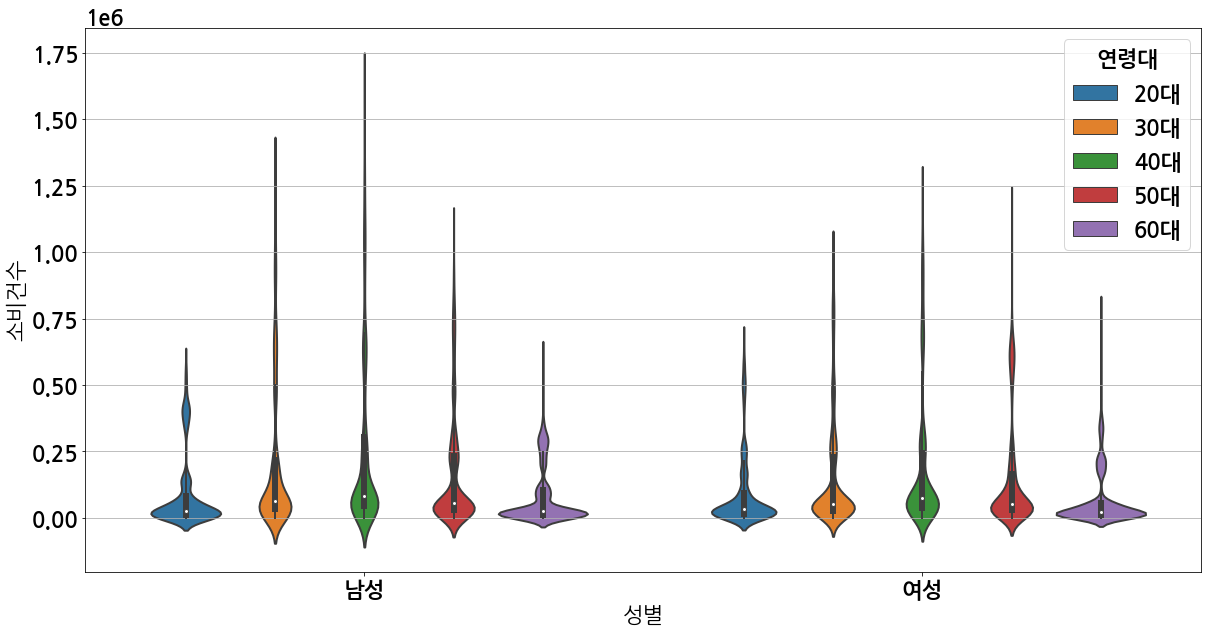

In [ ]:
sns.violinplot(x="성별", y="소비건수", hue="연령대", data=Samsungcard)

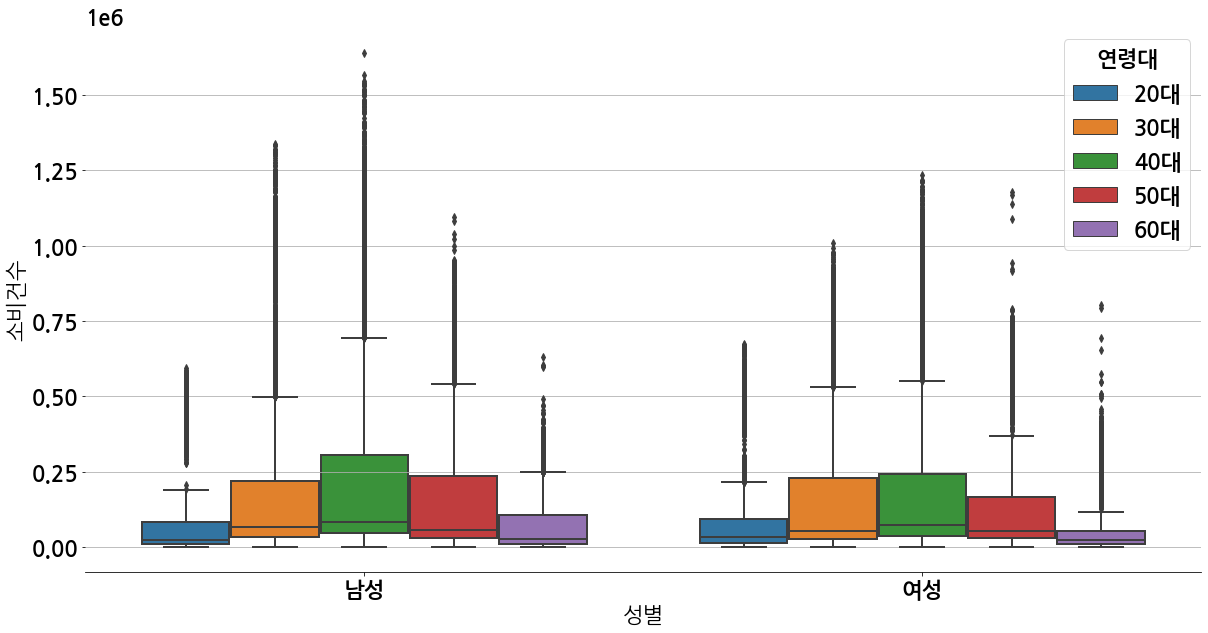

In [ ]:
sns.boxplot(x="성별", y="소비건수", hue="연령대", data=Samsungcard);
sns.despine(left=True)

<Figure size 1440x1440 with 0 Axes>

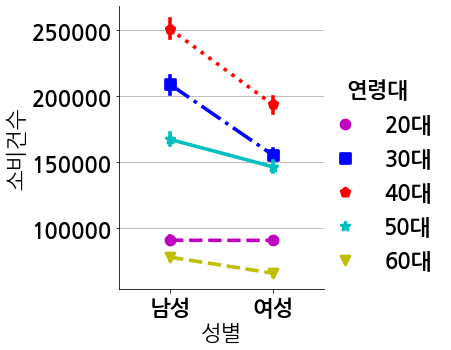

In [ ]:
fig = plt.figure(figsize=(20, 20))
sns.catplot(x="성별", y="소비건수", hue="연령대",
            palette={"20대": "m", "30대": "b", "40대": "r", "50대": "c", "60대": "y"},
            markers=["o","s","p","*","v"], linestyles=["--","-.",":","-","--"],
            kind="point", data=Samsungcard)

## 샘플링 전처리

In [ ]:
Samsungcard['date'] = Samsungcard['소비일자'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [ ]:
Samsungcard.info()

In [ ]:
data = Samsungcard.groupby('소비일자').sample(frac=.1)

In [ ]:
data['소비일자'] = data['소비일자'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7658 entries, 86 to 76487
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   소비일자    7658 non-null   datetime64[ns]
 1   소비업종    7658 non-null   object        
 2   성별      7658 non-null   object        
 3   연령대     7658 non-null   object        
 4   소비건수    7658 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 359.0+ KB


In [ ]:
data.reset_index(inplace = True, drop = True)
data

,소비일자,소비업종,성별,연령대,소비건수
0,2019-01-01,의료,여성,30대,47120
1,2019-01-01,편의점,여성,50대,129374
2,2019-01-01,백화점/상품권/아울렛,남성,30대,98496
3,2019-01-01,미용,여성,60대,4615
4,2019-01-01,할인점/마트,남성,50대,521388
...,...,...,...,...,...
7653,2020-06-30,교육/학원,남성,50대,31708
7654,2020-06-30,가전/가구,남성,30대,26861
7655,2020-06-30,가전/가구,남성,40대,41594
7656,2020-06-30,미용,여성,50대,34346


In [ ]:
import numpy as np

In [ ]:
temp = data.copy()
temp.pivot_table(index='소비일자',   # axis 0
                 columns='성별', # axis 1
                 values='소비건수',  # 집계값
                 aggfunc=np.mean, # 집계방법
                 fill_value=0).round(2) # null인경우

성별,남성,여성
소비일자,,
2019-01-01,183494.00,105796.67
2019-01-02,63338.75,131503.33
2019-01-03,120012.92,44323.00
2019-01-04,219865.09,45426.00
2019-01-05,194505.90,233807.25
...,...,...
2020-06-26,117005.60,192782.11
2020-06-27,56664.62,197726.50
2020-06-28,130219.75,99981.50


In [ ]:
grouped_gender_mean = temp.groupby(["소비일자", "성별", "연령대","소비업종"])["소비건수"].mean().round(1).reset_index()
grouped_gender_mean.head()

,소비일자,성별,연령대,소비업종,소비건수
0,2019-01-01,남성,30대,백화점/상품권/아울렛,98496
1,2019-01-01,남성,30대,여행/교통,92466
2,2019-01-01,남성,50대,자동차,15974
3,2019-01-01,남성,50대,편의점,189146
4,2019-01-01,남성,50대,할인점/마트,521388


## 그룹화 형식

In [ ]:
grouped_male_mean = grouped_gender_mean[grouped_gender_mean['성별']=="남성"]
grouped_female_mean = grouped_gender_mean[grouped_gender_mean['성별']=="여성"]

In [ ]:
grouped_agetwenty_mean = grouped_gender_mean[grouped_gender_mean['연령대']=="20대"]
grouped_agethirty_mean = grouped_gender_mean[grouped_gender_mean['연령대']=="30대"]
grouped_ageforty_mean = grouped_gender_mean[grouped_gender_mean['연령대']=="40대"]
grouped_agefifty_mean = grouped_gender_mean[grouped_gender_mean['연령대']=="50대"]
grouped_agesixty_mean = grouped_gender_mean[grouped_gender_mean['연령대']=="60대"]

In [ ]:
grouped_agetwenty_mean

,소비일자,성별,연령대,소비업종,소비건수
5,2019-01-01,여성,20대,스포츠/문화/레저,56758
14,2019-01-02,남성,20대,교육/학원,10356
15,2019-01-02,남성,20대,스포츠/문화/레저,68958
22,2019-01-02,여성,20대,교육/학원,18937
28,2019-01-03,남성,20대,가전/가구,8173
...,...,...,...,...,...
7630,2020-06-29,남성,20대,백화점/상품권/아울렛,14031
7631,2020-06-29,남성,20대,여행/교통,17540
7638,2020-06-29,여성,20대,편의점,236789
7644,2020-06-30,남성,20대,미용,16032


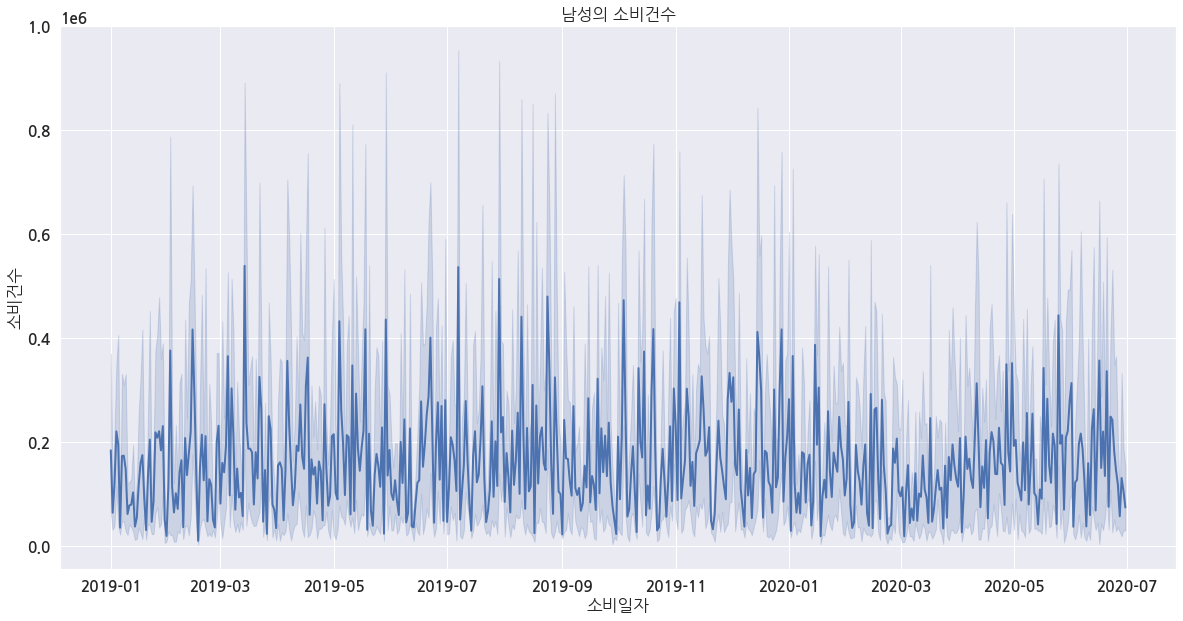

In [ ]:
sns.lineplot(data=grouped_male_mean, x = "소비일자", y = "소비건수")
plt.title("남성의 소비건수")
plt.show()

In [ ]:
sns.lineplot(data=grouped_female_mean, x = "소비일자", y = "소비건수")
plt.title("여성의 소비건수")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import datetime

## 새로운 데이터 프레임 생성값

In [ ]:
Samsungcard['month'] = pd.DatetimeIndex(Samsungcard['date']).month
Samsungcard.head()

KeyError: ignored

In [ ]:
Samsungcard['year'] = pd.DatetimeIndex(Samsungcard['date']).year
Samsungcard.head()

,소비일자,소비업종,성별,연령대,소비건수,date,month,year
0,20190101,가전/가구,남성,20대,5529,2019-01-01,1,2019
1,20190101,가전/가구,남성,30대,17536,2019-01-01,1,2019
2,20190101,가전/가구,남성,40대,22838,2019-01-01,1,2019
3,20190101,가전/가구,남성,50대,15801,2019-01-01,1,2019
4,20190101,가전/가구,남성,60대,6772,2019-01-01,1,2019


In [14]:
Samsungcard['month_year'] = pd.to_datetime(Samsungcard['date']).dt.to_period('M')
Samsungcard.head()

KeyError: ignored

In [ ]:
Samsungcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76580 entries, 0 to 76579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   소비일자        76580 non-null  int64         
 1   소비업종        76580 non-null  object        
 2   성별          76580 non-null  object        
 3   연령대         76580 non-null  object        
 4   소비건수        76580 non-null  int64         
 5   date        76580 non-null  datetime64[ns]
 6   month       76580 non-null  int64         
 7   year        76580 non-null  int64         
 8   month_year  76580 non-null  period[M]     
dtypes: datetime64[ns](1), int64(4), object(3), period[M](1)
memory usage: 5.3+ MB


In [ ]:
Samsungcard.mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


소비일자     2.019389e+07
소비건수     1.448751e+05
month    5.519196e+00
year     2.019333e+03
dtype: float64

In [ ]:
Samsungcard.groupby(['month_year'], as_index=False).mean()

,month_year,소비일자,소비건수,month,year
0,2019-01,20190116.0,137731.583410,1.0,2019.0
1,2019-02,20190214.5,136482.497959,2.0,2019.0
2,2019-03,20190316.0,146678.349078,3.0,2019.0
3,2019-04,20190415.5,150816.738333,4.0,2019.0
4,2019-05,20190516.0,157866.145161,5.0,2019.0
5,2019-06,20190615.5,158171.486667,6.0,2019.0
6,2019-07,20190716.0,153414.015207,7.0,2019.0
7,2019-08,20190816.0,159131.212903,8.0,2019.0
8,2019-09,20190915.5,149794.259048,9.0,2019.0
9,2019-10,20191016.0,153070.176267,10.0,2019.0


## month_year 기준으로 연습한 차트

In [12]:
import matplotlib.pyplot as plt
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15

In [13]:
fig = plt.figure(figsize=(20, 10)), plt.rc('font', size= BIGGER_SIZE)
sns.barplot(x="month_year", y="소비건수", data=Samsungcard)

ValueError: ignored

<Figure size 1440x720 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
import datetime

Samsungcard['month'] = pd.DatetimeIndex(Samsungcard['date']).month
Samsungcard['year'] = pd.DatetimeIndex(Samsungcard['date']).year
Samsungcard['month_year'] = pd.to_datetime(Samsungcard['date']).dt.to_period('M')
Samsungcard.groupby(['month_year'], as_index=False).mean()

import matplotlib.pyplot as plt
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15
fig=plt.figure(figsize=(20,10))
plt.rc('font', size = BIGGER_SIZE)
sns.barplot(x="month_year",y="소비건수",data=Samsungcard)

## 열을 이용한 필터링 방식

In [ ]:
Samsung_Conveniencestore =  Samsungcard['소비업종'] == '편의점'
print(Samsung_Conveniencestore.head())

Samsung_Conven = Samsungcard[Samsung_Conveniencestore]
print(Samsung_Conven.shape)

In [ ]:
Samsung_Car =  Samsungcard['소비업종'] == '자동차'
print(Samsung_Car.head())

Samsung_Cars = Samsungcard[Samsung_Car]
print(Samsung_Cars.shape)

In [ ]:
Samsung_Education =  Samsungcard['소비업종'] == '교육/학원'
print(Samsung_Education.head())

Samsung_Educations = Samsungcard[Samsung_Education]
print(Samsung_Educations.shape)

In [ ]:
Samsung_Service =  Samsungcard['소비업종'] == '가정생활/서비스'
print(Samsung_Service.head())

Samsung_Servicea = Samsungcard[Samsung_Service]
print(Samsung_Servicea.shape)

In [ ]:
Samsung_beauty =  Samsungcard['소비업종'] == '미용'
print(Samsung_beauty.head())

Samsung_beautys = Samsungcard[Samsung_beauty]
print(Samsung_beautys.shape)

In [ ]:
Samsung_Sports =  Samsungcard['소비업종'] == '스포츠/문화/레저'
print(Samsung_Sports.head())

Samsung_Sportsa = Samsungcard[Samsung_Sports]
print(Samsung_Sportsa.shape)

In [ ]:
Samsung_Furniture =  Samsungcard['소비업종'] == '가전/가구'
print(Samsung_Furniture.head())

Samsung_Furnitures = Samsungcard[Samsung_Furniture]
print(Samsung_Furnitures.shape)

In [ ]:
Samsung_Departmentstore=  Samsungcard['소비업종'] == '백화점/상품권/아울렛'
print(Samsung_Departmentstore.head())

Samsung_Departmentstores = Samsungcard[Samsung_Departmentstore]
print(Samsung_Departmentstores.shape)

In [ ]:
Samsung_Travel=  Samsungcard['소비업종'] == '여행/교통'
print(Samsung_Travel.head())

Samsung_Travels = Samsungcard[Samsung_Travel]
print(Samsung_Travels.shape)

In [ ]:
Samsung_Formalfood=  Samsungcard['소비업종'] == '요식/유흥'
print(Samsung_Formalfood.head())

Samsung_Formalfoods = Samsungcard[Samsung_Formalfood]
print(Samsung_Formalfoods.shape)

In [ ]:
Samsung_Medical= Samsungcard['소비업종'] == '의료'
print(Samsung_Medical.head())

Samsung_Medicals = Samsungcard[Samsung_Medical]
print(Samsung_Medicals.shape)

In [ ]:
Samsung_Oil= Samsungcard['소비업종'] == '주유'
print(Samsung_Oil.head())

Samsung_Oils = Samsungcard[Samsung_Oil]
print(Samsung_Oils.shape)

In [ ]:
Samsung_Fashion= Samsungcard['소비업종'] == '패션/잡화'
print(Samsung_Fashion.head())

Samsung_Fashions = Samsungcard[Samsung_Fashion]
print(Samsung_Fashions.shape)

In [ ]:
Samsung_Mart= Samsungcard['소비업종'] == '할인점/마트'
print(Samsung_Mart.head())

Samsung_Marts = Samsungcard[Samsung_Mart]
print(Samsung_Marts.shape)

## 업종별 최종 시각화

In [ ]:
fig=plt.figure(figsize=(20,10))
plt.rc('font', size = BIGGER_SIZE)
ax = sns.barplot(x="month_year", y="소비건수", data=Samsung_Conven)
ax.set_title('편의점')

In [ ]:
fig=plt.figure(figsize=(20,10))
plt.rc('font', size = BIGGER_SIZE)
ax = sns.barplot(x="month_year", y="소비건수", data=Samsung_Cars)
ax.set_title('자동차')

In [ ]:
fig=plt.figure(figsize=(20,10))
plt.rc('font', size = BIGGER_SIZE)
ax = sns.barplot(x="month_year", y="소비건수", data=Samsung_Educations)
ax.set_title('교육/학원')

In [ ]:
fig=plt.figure(figsize=(20,10))
plt.rc('font', size = BIGGER_SIZE)
ax = sns.barplot(x="month_year", y="소비건수", data=Samsung_Servicea)
ax.set_title('가정생활/서비스')

In [ ]:
fig=plt.figure(figsize=(20,10))
plt.rc('font', size = BIGGER_SIZE)
ax = sns.barplot(x="month_year", y="소비건수", data=Samsung_Sportsa)
ax.set_title('스포츠/문화/레저')

In [ ]:
fig=plt.figure(figsize=(20,10))
plt.rc('font', size = BIGGER_SIZE)
ax = sns.barplot(x="month_year", y="소비건수", data=Samsung_beautys)
ax.set_title('미용')

In [ ]:
fig=plt.figure(figsize=(20,10))
plt.rc('font', size = BIGGER_SIZE)
ax = sns.barplot(x="month_year", y="소비건수", data=Samsung_Furnitures)
ax.set_title('가전/가구')

In [ ]:
fig=plt.figure(figsize=(20,10))
plt.rc('font', size = BIGGER_SIZE)
ax = sns.barplot(x="month_year", y="소비건수", data=Samsung_Departmentstores)
ax.set_title('백화점/상품권/아울렛')

In [ ]:
fig=plt.figure(figsize=(20,10))
plt.rc('font', size = BIGGER_SIZE)
ax = sns.barplot(x="month_year", y="소비건수", data=Samsung_Travels)
ax.set_title('여행/교통')

In [ ]:
fig=plt.figure(figsize=(20,10))
plt.rc('font', size = BIGGER_SIZE)
ax = sns.barplot(x="month_year", y="소비건수", data=Samsung_Formalfoods)
ax.set_title('요식/유흥')

In [ ]:
fig=plt.figure(figsize=(20,10))
plt.rc('font', size = BIGGER_SIZE)
ax = sns.barplot(x="month_year", y="소비건수", data=Samsung_Medicals)
ax.set_title('의료')

In [ ]:
fig=plt.figure(figsize=(20,10))
plt.rc('font', size = BIGGER_SIZE)
ax = sns.barplot(x="month_year", y="소비건수", data=Samsung_Oils)
ax.set_title('주유')

In [ ]:
fig=plt.figure(figsize=(20,10))
plt.rc('font', size = BIGGER_SIZE)
ax = sns.barplot(x="month_year", y="소비건수", data=Samsung_Fashions)
ax.set_title('패션/잡화')

In [ ]:
fig=plt.figure(figsize=(20,10))
plt.rc('font', size = BIGGER_SIZE)
ax = sns.barplot(x="month_year", y="소비건수", data=Samsung_Marts)
ax.set_title('할인점/마트')